In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
print("The shape of the train data is: %d, %d" % (train.shape[0],train.shape[1]))
train.head()

The shape of the train data is: 45593, 20


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [ ]:
print("The shape of the test data is: %d, %d" % (test.shape[0],test.shape[1]))
test.head()

The shape of the test data is: 11399, 19


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [ ]:
# Checking for Duplicate Rows in the training set
duplicate_rows=train.duplicated().sum()
print("Duplicate Rows :", duplicate_rows)

Duplicate Rows : 0


In [ ]:
def detectmissing(df):
    summary = pd.DataFrame(df.dtypes,columns=['data type']).reset_index()
    summary.rename(columns={'index':'features'}, inplace=True)
    summary["Missing %"]=df.isnull().sum().values/len(train)*100
    return summary


In [ ]:
# Replace string 'NaN' with NaN values
train = train.replace('NaN', np.nan,regex=True)
test = test.replace('NaN', np.nan,regex=True)


In [ ]:
data_missing=detectmissing(train)
data_missing

,features,data type,Missing %
0,ID,object,0.000000
1,Delivery_person_ID,object,0.000000
2,Delivery_person_Age,object,4.066414
3,Delivery_person_Ratings,object,4.184853
4,Restaurant_latitude,float64,0.000000
5,Restaurant_longitude,float64,0.000000
6,Delivery_location_latitude,float64,0.000000
7,Delivery_location_longitude,float64,0.000000
8,Order_Date,object,0.000000
9,Time_Orderd,object,3.796635


In [ ]:
train.dropna(inplace=True)
for i in test.columns:
    if test[i].dtypes=='int64' or test[i].dtypes=='float64':
       test[i].fillna(train[i].median(),inplace=True)
for i in test.columns:
    if test[i].dtypes=='object':
       test[i].fillna(train[i].mode()[0],inplace=True)

In [ ]:
train.reset_index(drop=True,inplace=True)
train.shape

(41368, 20)

Since we are given the longitutde and latitudes of the restaurant and the delivery location hence using them we can calculate the distance between the restaurant and the destination

For doing so we use the Haversine formula to calculates the distance between two points on the surface of a sphere (e.g., Earth)using their latitude and longitude.

In [ ]:
import math

def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Radius of the Earth in kilometers
    radius = 6371

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    dist = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = radius * dist #to convert the angular distance into physical distance

    return distance




In [ ]:
# Calculate the distance between each pair of points for training data

for i in range(len(train)):
    train.loc[i, 'distance'] = calculate_distance(train.loc[i, 'Restaurant_latitude'],
                                        train.loc[i, 'Restaurant_longitude'],
                                        train.loc[i, 'Delivery_location_latitude'],
                                        train.loc[i, 'Delivery_location_longitude'])
train.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'],axis=1,inplace=True)

In [ ]:
# Calculate the distance between each pair of points for testing data
for i in range(len(test)):
    test.loc[i, 'distance'] = calculate_distance(test.loc[i, 'Restaurant_latitude'],
                                        test.loc[i, 'Restaurant_longitude'],
                                        test.loc[i, 'Delivery_location_latitude'],
                                        test.loc[i, 'Delivery_location_longitude'])
test.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'],axis=1,inplace=True)

In [ ]:
pd.set_option('display.max_columns',None)
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance
0,0x4607,INDORES13DEL02,37,4.9,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,3.025149
1,0xb379,BANGRES18DEL02,34,4.5,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,20.183530
2,0x5d6d,BANGRES19DEL01,23,4.4,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,1.552758
3,0x7a6a,COIMBRES13DEL02,38,4.7,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,7.790401
4,0x70a2,CHENRES12DEL01,32,4.6,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,6.210138


In [ ]:
train['Time_taken(min)']=train['Time_taken(min)'].str.split(" ", expand=True)[1]
train['Time_taken(min)'].head()

0    24
1    33
2    26
3    21
4    30
Name: Time_taken(min), dtype: object

In [ ]:
train['Weatherconditions']=train['Weatherconditions'].str.split(" ", expand=True)[1]
test['Weatherconditions']=test['Weatherconditions'].str.split(" ", expand=True)[1]

In [ ]:
train['Weatherconditions'].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy'],
      dtype=object)

In [ ]:
train['Time_taken(min)']=train['Time_taken(min)'].astype('float64')

In [ ]:
col1=['Delivery_person_Ratings','distance','Delivery_person_Age','Vehicle_condition','multiple_deliveries','Time_taken(min)']
col2=['Delivery_person_Ratings','distance','Delivery_person_Age','Vehicle_condition','multiple_deliveries']
for f in col1:
    train[col1]=train[col1].astype('float64')

for f in col2:
    test[col2]=test[col2].astype('float64')

In [ ]:
train.dtypes

ID                          object
Delivery_person_ID          object
Delivery_person_Age        float64
Delivery_person_Ratings    float64
Order_Date                  object
Time_Orderd                 object
Time_Order_picked           object
Weatherconditions           object
Road_traffic_density        object
Vehicle_condition          float64
Type_of_order               object
Type_of_vehicle             object
multiple_deliveries        float64
Festival                    object
City                        object
Time_taken(min)            float64
distance                   float64
dtype: object

# EDA

# Information on variables

1.ID: order ID number

2.Delivery_person_ID: ID number of the delivery partner

3.Delivery_person_Age: Age of the delivery partner

4.Delivery_person_Ratings: ratings of the delivery partner based on past deliveries

5.Restaurant_latitude: The latitude of the restaurant

6.Restaurant_longitude: The longitude of the restaurant

7.Delivery_location_latitude: The latitude of the delivery location

8.Delivery_location_longitude: The longitude of the delivery location

9.Type_of_order: The type of meal ordered by the customer

10.Type_of_vehicle: The type of vehicle delivery partner rides

11.Time_taken(min): The time taken by the delivery partner to complete the order

<Axes: xlabel='Time_taken(min)', ylabel='Density'>

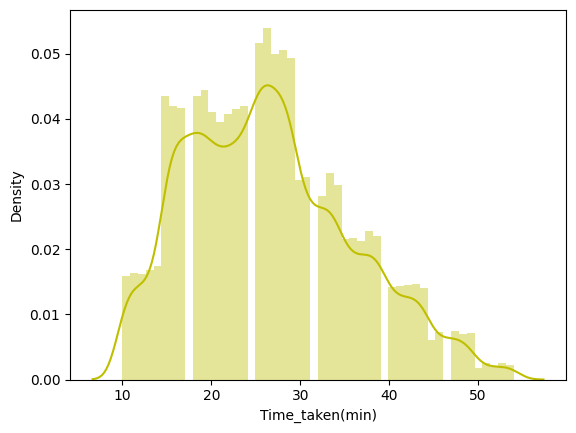

In [ ]:
sns.distplot(train['Time_taken(min)'],color='y')

In order to use linear regression we had to check the distribution of the target variable as for applying linear regression the target variable should be normally distributed. And over here we can clearly see that over here it is not representing a bell shape moreover it is showing a skewed data.

Text(0.5, 1.0, 'Boxplots of Time taken by Age ')

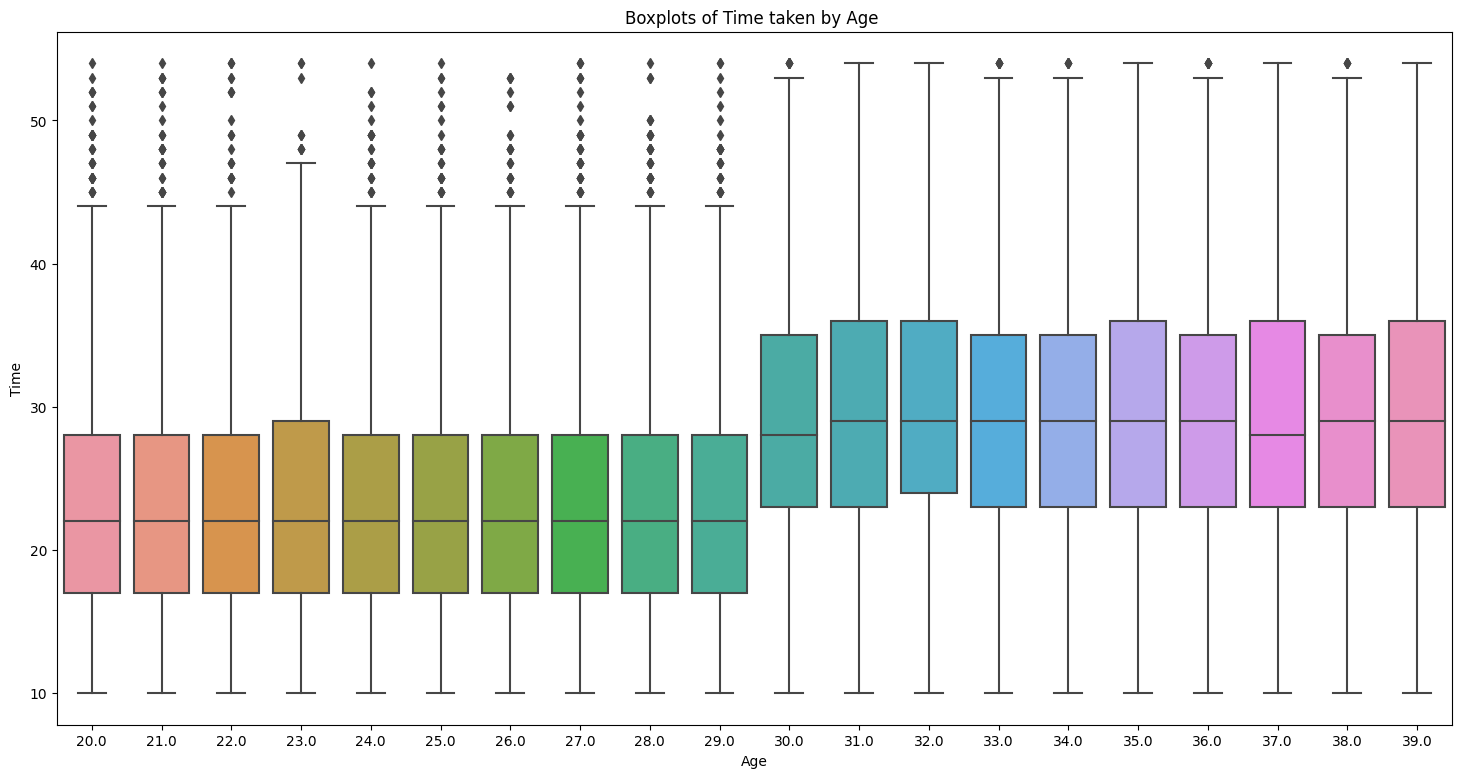

In [ ]:
plt.figure(figsize=(18,9))
sns.boxplot(x='Delivery_person_Age', y='Time_taken(min)',data=train)
plt.xlabel('Age')
plt.ylabel('Time')
plt.title('Boxplots of Time taken by Age ')

Text(0.5, 1.0, 'Boxplots of Time taken by ratings')

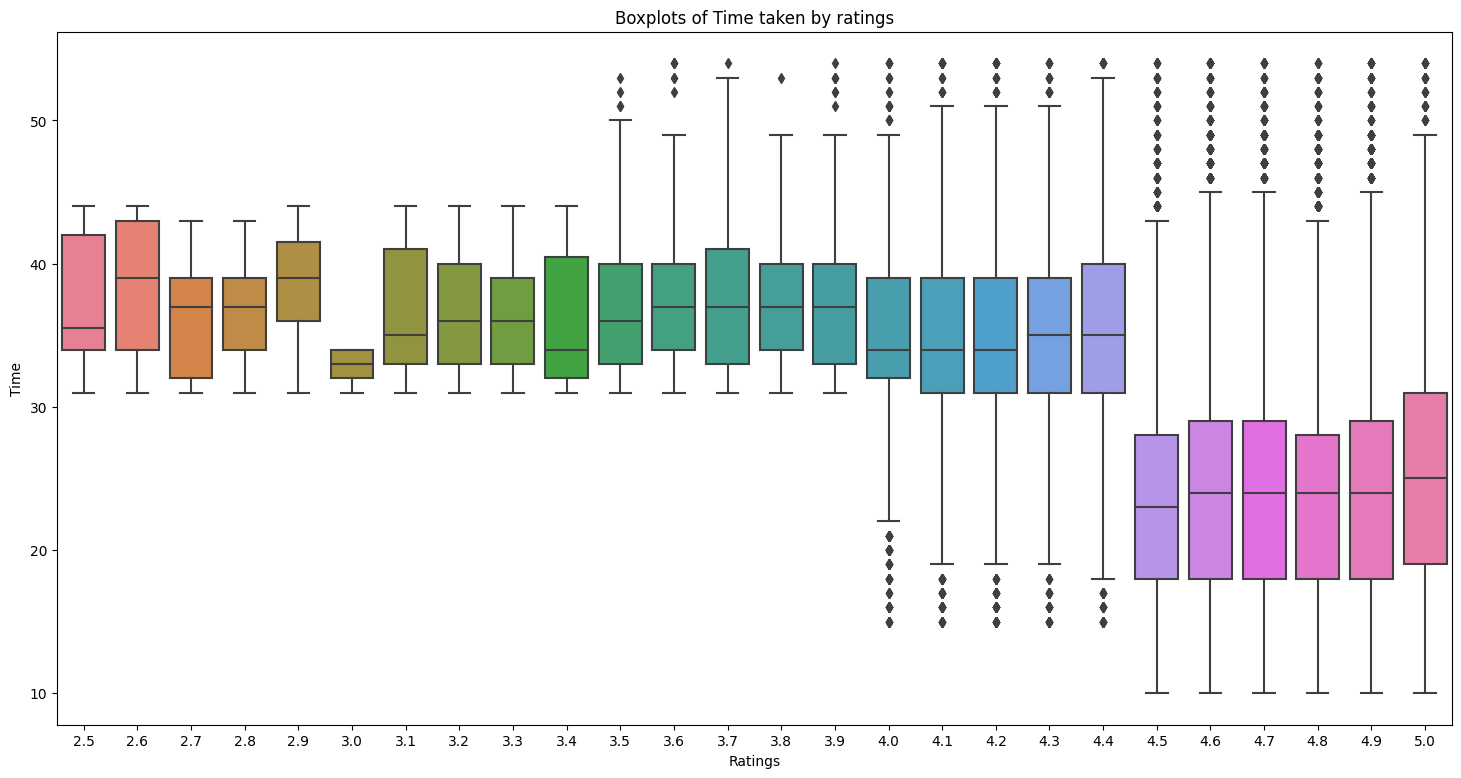

In [ ]:
plt.figure(figsize=(18,9))
sns.boxplot(x='Delivery_person_Ratings', y='Time_taken(min)', data=train,palette='husl')
plt.xlabel('Ratings')
plt.ylabel('Time')
plt.title('Boxplots of Time taken by ratings')

We can notice that if the delivery is taken by a person having delivery rating more than 4.4, the time taken to deliver is significantly lower.

In [ ]:
# Convert 'Date' column to datetime format
train['Order_Date']=pd.to_datetime(train['Order_Date'],format="%d-%m-%Y")
test['Order_Date']=pd.to_datetime(test['Order_Date'],format="%d-%m-%Y")

In [ ]:
print(train['Order_Date'].dtype)

datetime64[ns]


In [ ]:
# Calculate the day of the week using 'dt.dayofweek'
train['DayOfWeek'] = train['Order_Date'].dt.day_name()
test['DayOfWeek'] = test['Order_Date'].dt.day_name()

Text(0.5, 1.0, 'Time taken by different days of a week')

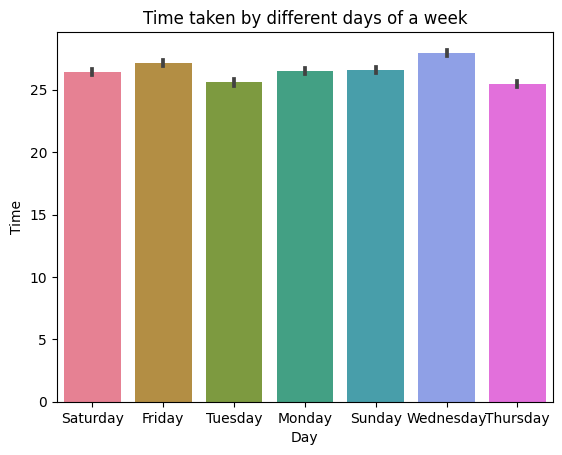

In [ ]:
df=train.groupby('DayOfWeek')['Time_taken(min)'].mean().rename('Average Time Taken').reset_index()
sns.barplot(x='DayOfWeek', y='Time_taken(min)', data=train,palette='husl')
plt.xlabel('Day')
plt.ylabel('Time')
plt.title('Time taken by different days of a week')

In [ ]:
# Calculate the day of the week using 'dt.dayofweek'
train['month'] = train['Order_Date'].dt.month_name()
test['month'] = test['Order_Date'].dt.month_name()

Text(0.5, 1.0, 'Time taken by different month')

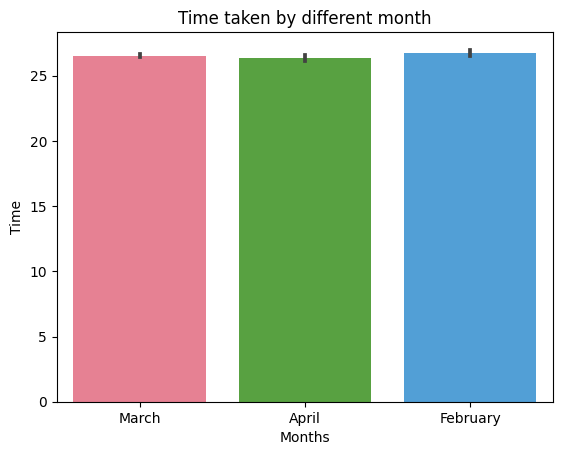

In [ ]:
df=train.groupby('month')['Time_taken(min)'].mean().rename('Average Time Taken').reset_index()
sns.barplot(x='month', y='Time_taken(min)', data=train,palette='husl')
plt.xlabel('Months')
plt.ylabel('Time')
plt.title('Time taken by different month')

In [ ]:
# Convert 'Time ordered' column to datetime format
train['Time_Orderd']=pd.to_datetime(train['Time_Orderd'])
test['Time_Orderd']=pd.to_datetime(test['Time_Orderd'])

In [ ]:
print(train['Time_Orderd'].dtype)

datetime64[ns]


In [ ]:
train['Hour'] = train['Time_Orderd'].dt.hour
test['Hour'] = test['Time_Orderd'].dt.hour

In [ ]:
df=train.groupby('Hour')['Time_taken(min)'].mean().rename('Average Time Taken').reset_index().sort_values('Average Time Taken',ascending=False)


Text(0.5, 1.0, 'Time taken by hours of a day')

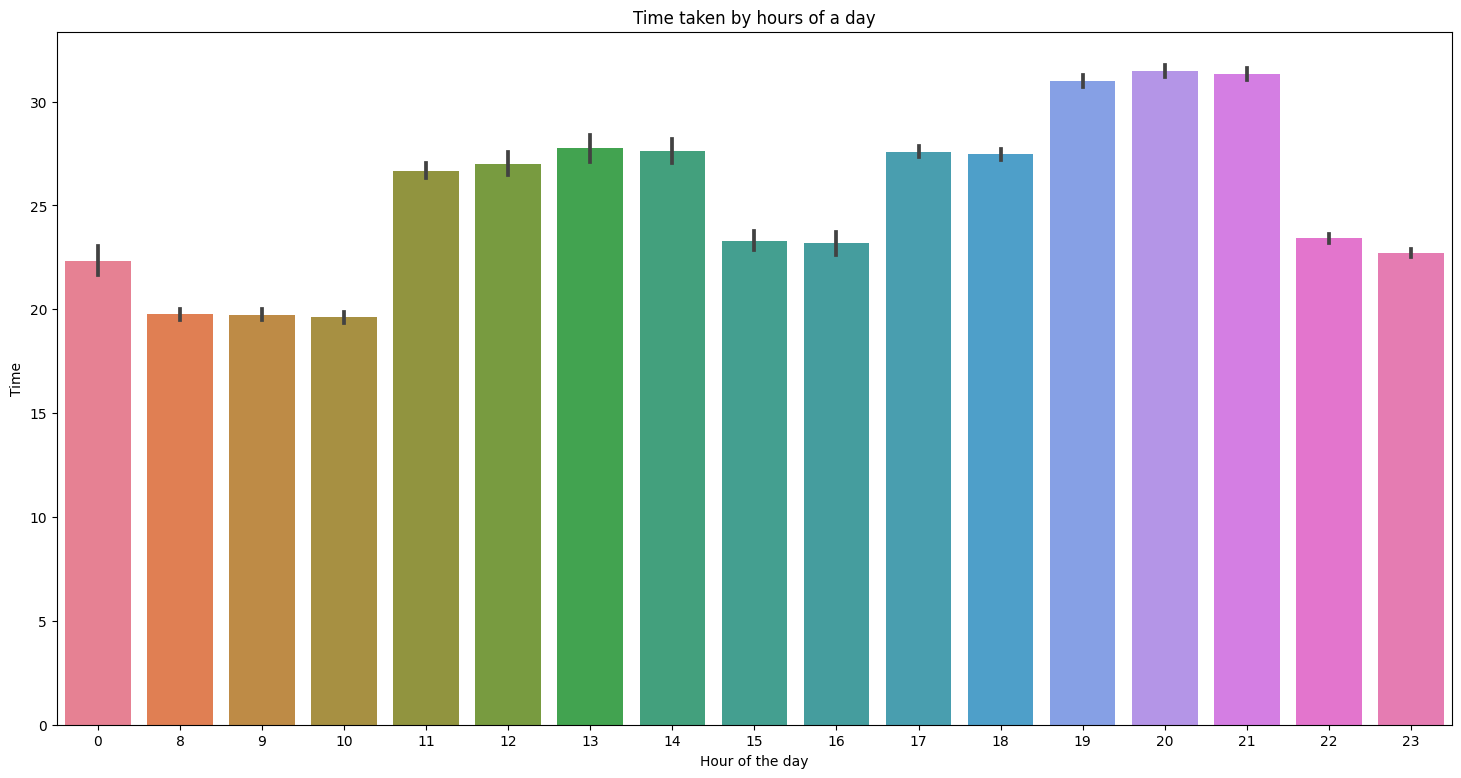

In [ ]:
plt.figure(figsize=(18,9))
sns.barplot(x='Hour', y='Time_taken(min)', data=train,palette='husl')
plt.xlabel('Hour of the day')
plt.ylabel('Time')
plt.title('Time taken by hours of a day')

Text(0.5, 1.0, 'Boxplots of Time taken by weather')

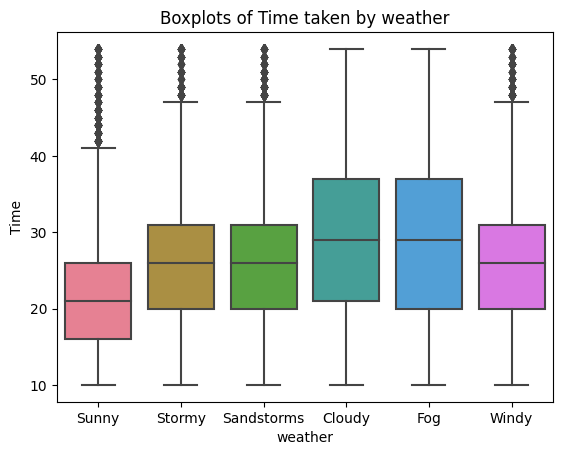

In [ ]:
sns.boxplot(x='Weatherconditions', y='Time_taken(min)', data=train,palette='husl')
plt.xlabel('weather')
plt.ylabel('Time')
plt.title('Boxplots of Time taken by weather')

We can see that the different weathers clearly affect the delivery time.

Text(0.5, 1.0, 'Boxplots of Time taken by trafic density')

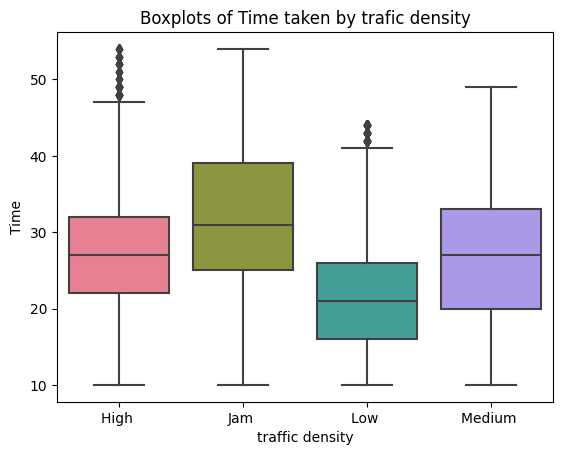

In [ ]:
sns.boxplot(x='Road_traffic_density', y='Time_taken(min)', data=train,palette='husl')
plt.xlabel('traffic density')
plt.ylabel('Time')
plt.title('Boxplots of Time taken by trafic density')

Text(0.5, 1.0, 'Boxplots of Time taken by different vehicle conditions')

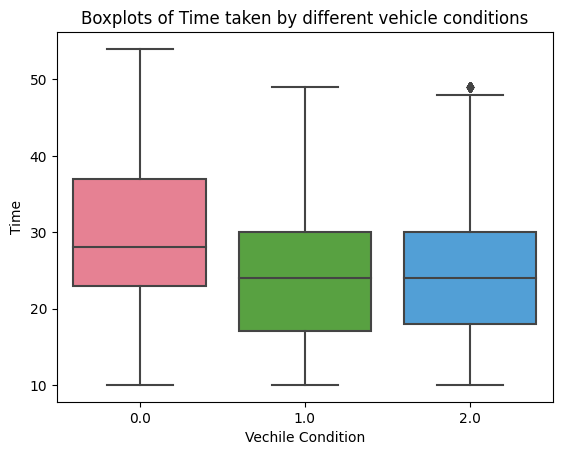

In [ ]:
sns.boxplot(x='Vehicle_condition', y='Time_taken(min)',data=train,palette='husl')
plt.xlabel('Vechile Condition')
plt.ylabel('Time')
plt.title('Boxplots of Time taken by different vehicle conditions')

Text(0.5, 1.0, 'Boxplots of Time taken by type of vechile used')

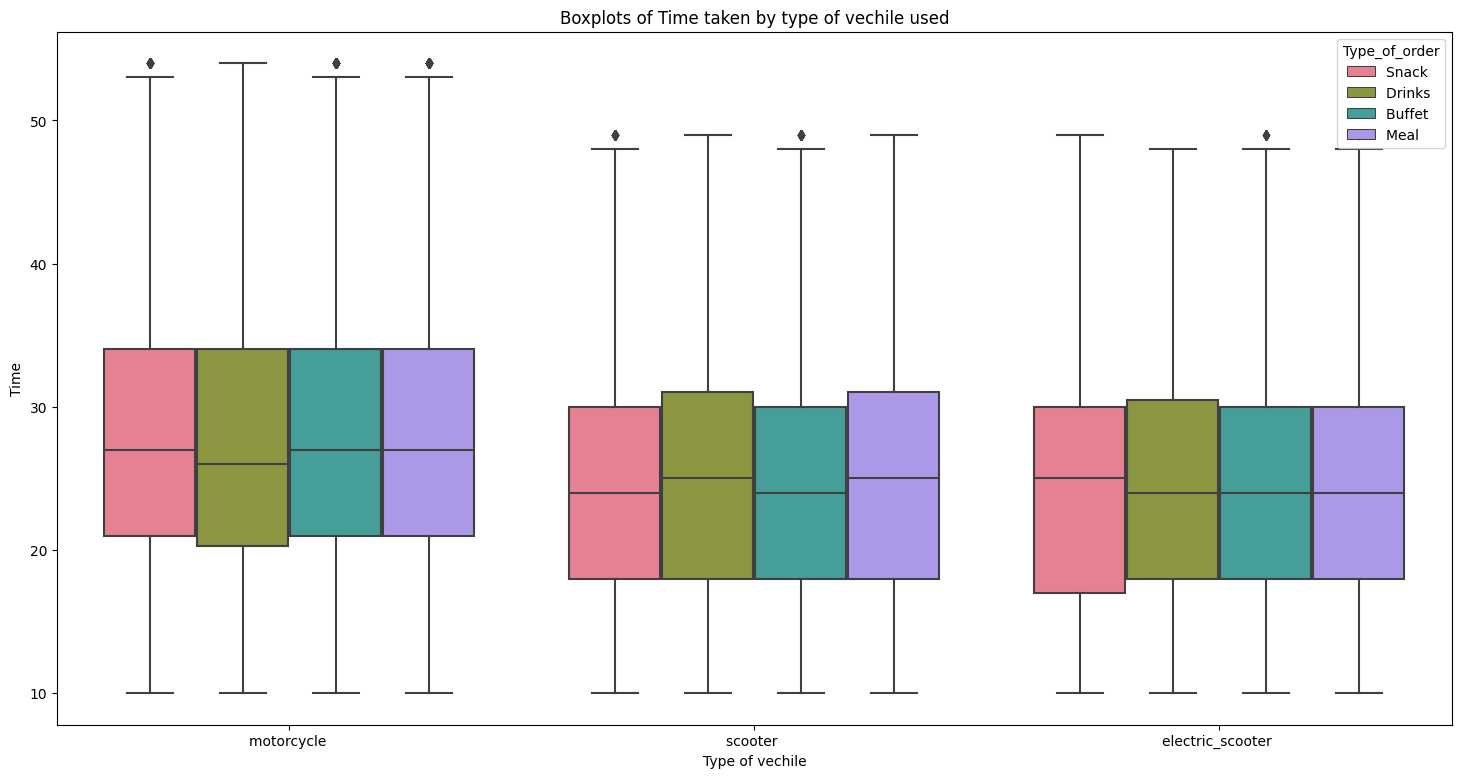

In [ ]:
plt.figure(figsize=(18,9))
sns.boxplot(x='Type_of_vehicle', y='Time_taken(min)',hue='Type_of_order', data=train,palette='husl')
plt.xlabel('Type of vechile')
plt.ylabel('Time')
plt.title('Boxplots of Time taken by type of vechile used')

Text(0.5, 1.0, 'Boxplots of Time taken by multiple deliveries')

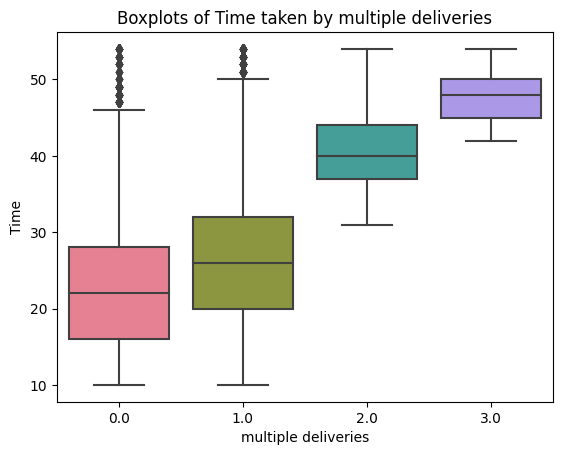

In [ ]:

sns.boxplot(x='multiple_deliveries', y='Time_taken(min)',data=train,palette='husl')
plt.xlabel('multiple deliveries')
plt.ylabel('Time')
plt.title('Boxplots of Time taken by multiple deliveries')

Text(0.5, 1.0, 'Boxplots of Time taken by city')

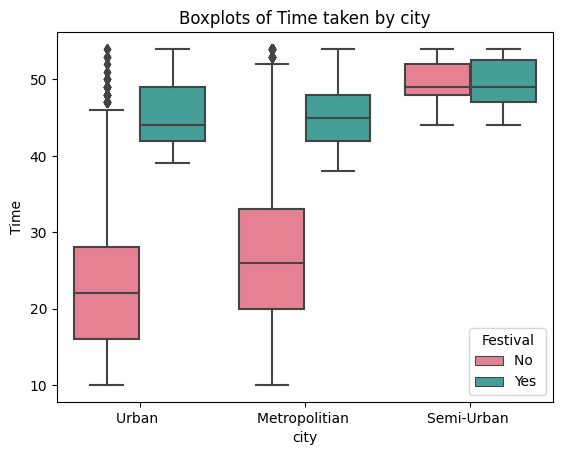

In [ ]:
sns.boxplot(x='City', y='Time_taken(min)',hue='Festival',data=train,palette='husl')
plt.xlabel('city')
plt.ylabel('Time')
plt.title('Boxplots of Time taken by city')

We can notice that in all type of cities a festival on a particular day definitely increases the delivery time but in the sem-urban cities even on the days where there is no festival, the delivery time is quite high.

# Encoding categorical variables:

In [ ]:
target=train['Time_taken(min)']
ID=test['ID']
train.drop(['ID','Delivery_person_ID','Order_Date','Time_Orderd','Time_Order_picked','Time_taken(min)','Type_of_order','month'],axis=1,inplace=True)
test.drop(['ID','Delivery_person_ID','Order_Date','Time_Orderd','Time_Order_picked','Type_of_order','month'],axis=1,inplace=True)

In [ ]:
train.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,distance,DayOfWeek,Hour
0,37.0,4.9,Sunny,High,2.0,motorcycle,0.0,No,Urban,3.025149,Saturday,11
1,34.0,4.5,Stormy,Jam,2.0,scooter,1.0,No,Metropolitian,20.183530,Friday,19
2,23.0,4.4,Sandstorms,Low,0.0,motorcycle,1.0,No,Urban,1.552758,Saturday,8
3,38.0,4.7,Sunny,Medium,0.0,motorcycle,1.0,No,Metropolitian,7.790401,Tuesday,18
4,32.0,4.6,Cloudy,High,1.0,scooter,1.0,No,Metropolitian,6.210138,Saturday,13


In [ ]:
cat_cols=['Weatherconditions','Road_traffic_density','Type_of_vehicle','Festival','City','DayOfWeek']

In [ ]:
#Encoding my categorical labels
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore')
encoder.fit(train[cat_cols])


OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False,
              sparse_output=False)

In [ ]:
def get_encoder(df):
    temp_df = pd.DataFrame(data=encoder.transform(df[cat_cols]), columns=encoder.get_feature_names_out())
    df.drop(columns=cat_cols, axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

In [ ]:
encod_train = get_encoder(train)
encod_test = get_encoder(test)

In [ ]:
encod_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,distance,Hour,Weatherconditions_Fog,Weatherconditions_Sandstorms,Weatherconditions_Stormy,Weatherconditions_Sunny,Weatherconditions_Windy,Road_traffic_density_Jam,Road_traffic_density_Low,Road_traffic_density_Medium,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Festival_Yes,City_Semi-Urban,City_Urban,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,37.0,4.9,2.0,0.0,3.025149,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,34.0,4.5,2.0,1.0,20.183530,19,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23.0,4.4,0.0,1.0,1.552758,8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,38.0,4.7,0.0,1.0,7.790401,18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32.0,4.6,1.0,1.0,6.210138,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
encod_train.shape

(41368, 25)

In [ ]:
encod_train.dtypes

Delivery_person_Age             float64
Delivery_person_Ratings         float64
Vehicle_condition               float64
multiple_deliveries             float64
distance                        float64
Hour                              int64
Weatherconditions_Fog           float64
Weatherconditions_Sandstorms    float64
Weatherconditions_Stormy        float64
Weatherconditions_Sunny         float64
Weatherconditions_Windy         float64
Road_traffic_density_Jam        float64
Road_traffic_density_Low        float64
Road_traffic_density_Medium     float64
Type_of_vehicle_motorcycle      float64
Type_of_vehicle_scooter         float64
Festival_Yes                    float64
City_Semi-Urban                 float64
City_Urban                      float64
DayOfWeek_Monday                float64
DayOfWeek_Saturday              float64
DayOfWeek_Sunday                float64
DayOfWeek_Thursday              float64
DayOfWeek_Tuesday               float64
DayOfWeek_Wednesday             float64


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(encod_train)
X_test_scaled = scaler.transform(encod_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor(n_neighbors=5))) #double brackets bcoz append takes only a single argument
models.append(('TREES', DecisionTreeRegressor(max_depth=25)))
models.append(('FOREST', RandomForestRegressor(max_depth=25,n_estimators=250)))
models

[('LR', LinearRegression()),
 ('KNN', KNeighborsRegressor()),
 ('TREES', DecisionTreeRegressor(max_depth=10)),
 ('FOREST', RandomForestRegressor(max_depth=25, n_estimators=250))]

In [ ]:
from sklearn.model_selection import cross_val_score
names = []

for name, model in models:
    # RMSE Scoring
    #kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = np.sqrt(-cross_val_score(model, X_train_scaled, target, cv=kfolds, scoring='neg_mean_squared_error'))
    print(cv_results)
    mean_score = np.mean(cv_results)
    print(f"Average RMSE for {name} is: {mean_score:.3f}")





[6.08331681 6.13572505 6.07709586 6.13084549 6.06337801]
Average RMSE for LR is: 6.098
[5.7381198  5.77653853 5.78786124 5.76106003 5.75267773]
Average RMSE for KNN is: 5.763
[4.42586774 4.43544133 4.41609586 4.4397585  4.40104075]
Average RMSE for TREES is: 4.424
[3.92179607 3.85781811 3.8522549  3.89750127 3.90144693]
Average RMSE for FOREST is: 3.886


In [ ]:
from sklearn.model_selection import cross_val_score
names = []

for name, model in models:
    # R2 Scoring
    #kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = (cross_val_score(model, X_train_scaled, target, cv=kfolds, scoring='r2'))
    print(cv_results)
    mean_score = np.mean(cv_results)
    print(f"Average R2 score for {name} is: {mean_score:.3f}")


[0.57517431 0.56801362 0.57632697 0.56852042 0.57790578]
Average R2 score for LR is: 0.573
[0.62201973 0.61711036 0.61569603 0.61900059 0.62005546]
Average R2 score for KNN is: 0.619
[0.77490343 0.7747667  0.77619286 0.77369566 0.77657717]
Average R2 score for TREES is: 0.775
[0.82324761 0.82911547 0.8297634  0.82533439 0.82481248]
Average R2 score for FOREST is: 0.826


In [ ]:
rg_model= RandomForestRegressor()
rg_model.fit(encod_train,target)
y_pred=rg_model.predict(encod_test)
final=pd.DataFrame({"ID": ID, 'Predictions':y_pred})
final

,ID,Predictions
0,0x2318,17.02
1,0x3474,31.36
2,0x9420,29.05
3,0x72ee,29.82
4,0xa759,22.76
...,...,...
11394,0x6909,21.46
11395,0x443b,29.36
11396,0x1ea5,17.78
11397,0x22d4,28.86
